In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/instrustion-detection-system/Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv
/kaggle/input/instrustion-detection-system/Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv
/kaggle/input/instrustion-detection-system/Tuesday-WorkingHours.pcap_ISCX.csv
/kaggle/input/instrustion-detection-system/Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv
/kaggle/input/instrustion-detection-system/Monday-WorkingHours.pcap_ISCX.csv
/kaggle/input/instrustion-detection-system/Friday-WorkingHours-Morning.pcap_ISCX.csv
/kaggle/input/instrustion-detection-system/Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX.csv
/kaggle/input/instrustion-detection-system/Wednesday-workingHours.pcap_ISCX.csv


In [2]:
import pandas as pd
import os
from pathlib import Path

def check_and_merge_csv_files(directory_path):
    """
    Read all CSV files in a directory, check if they have the same columns,
    and merge them if they do.
    
    Parameters:
    directory_path (str): Path to directory containing CSV files
    
    Returns:
    tuple: (merged_df, status_message)
        - merged_df: Pandas DataFrame if merge successful, None if failed
        - status_message: String explaining the result
    """
    # Get list of all CSV files in directory
    csv_files = list(Path(directory_path).glob('*.csv'))
    
    if not csv_files:
        return None, "No CSV files found in the specified directory"
    
    # Read all dataframes and store their columns
    dataframes = []
    columns_list = []
    file_names = []
    
    for file_path in csv_files:
        try:
            df = pd.read_csv(file_path)
            dataframes.append(df)
            columns_list.append(set(df.columns))
            file_names.append(file_path.name)
        except Exception as e:
            return None, f"Error reading {file_path.name}: {str(e)}"
    
    # Check if all files have the same columns
    first_columns = columns_list[0]
    all_same_columns = all(cols == first_columns for cols in columns_list)
    
    if not all_same_columns:
        # Find files with different columns
        different_files = []
        for i, cols in enumerate(columns_list):
            if cols != first_columns:
                missing = first_columns - cols
                extra = cols - first_columns
                different_files.append({
                    'file': file_names[i],
                    'missing_columns': list(missing) if missing else None,
                    'extra_columns': list(extra) if extra else None
                })
        
        # Create detailed error message
        error_msg = "Files have different columns:\n"
        for diff in different_files:
            error_msg += f"\nFile: {diff['file']}"
            if diff['missing_columns']:
                error_msg += f"\n  Missing columns: {', '.join(diff['missing_columns'])}"
            if diff['extra_columns']:
                error_msg += f"\n  Extra columns: {', '.join(diff['extra_columns'])}"
        
        return None, error_msg
    
    # Merge all dataframes
    merged_df = pd.concat(dataframes, ignore_index=True)
    
    success_msg = f"Successfully merged {len(dataframes)} files with {len(first_columns)} columns"
    return merged_df, success_msg

In [6]:
directory = "/kaggle/input/instrustion-detection-system"

df, message = check_and_merge_csv_files(directory)
print(message)

if df is not None:
    print("\nMerged DataFrame info:")
    print(df.info())

Successfully merged 8 files with 79 columns

Merged DataFrame info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2830743 entries, 0 to 2830742
Data columns (total 79 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0    Destination Port             int64  
 1    Flow Duration                int64  
 2    Total Fwd Packets            int64  
 3    Total Backward Packets       int64  
 4   Total Length of Fwd Packets   int64  
 5    Total Length of Bwd Packets  int64  
 6    Fwd Packet Length Max        int64  
 7    Fwd Packet Length Min        int64  
 8    Fwd Packet Length Mean       float64
 9    Fwd Packet Length Std        float64
 10  Bwd Packet Length Max         int64  
 11   Bwd Packet Length Min        int64  
 12   Bwd Packet Length Mean       float64
 13   Bwd Packet Length Std        float64
 14  Flow Bytes/s                  float64
 15   Flow Packets/s               float64
 16   Flow IAT Mean                float64
 1

In [7]:
df.head()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,22,1266342,41,44,2664,6954,456,0,64.975610,109.864573,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,22,1319353,41,44,2664,6954,456,0,64.975610,109.864573,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,22,160,1,1,0,0,0,0,0.000000,0.000000,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,22,1303488,41,42,2728,6634,456,0,66.536585,110.129945,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,35396,77,1,2,0,0,0,0,0.000000,0.000000,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


In [8]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Actual column names in the dataset:
['Destination Port', 'Flow Duration', 'Total Fwd Packets', 'Total Backward Packets', 'Total Length of Fwd Packets', 'Total Length of Bwd Packets', 'Fwd Packet Length Max', 'Fwd Packet Length Min', 'Fwd Packet Length Mean', 'Fwd Packet Length Std', 'Bwd Packet Length Max', 'Bwd Packet Length Min', 'Bwd Packet Length Mean', 'Bwd Packet Length Std', 'Flow Bytes/s', 'Flow Packets/s', 'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min', 'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max', 'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean', 'Bwd IAT Std', 'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags', 'Fwd URG Flags', 'Bwd URG Flags', 'Fwd Header Length', 'Bwd Header Length', 'Fwd Packets/s', 'Bwd Packets/s', 'Min Packet Length', 'Max Packet Length', 'Packet Length Mean', 'Packet Length Std', 'Packet Length Variance', 'FIN Flag Count', 'SYN Flag Count', 'RST Flag Count', 'PSH Flag Count', 'ACK Flag Count', 'URG Flag Count

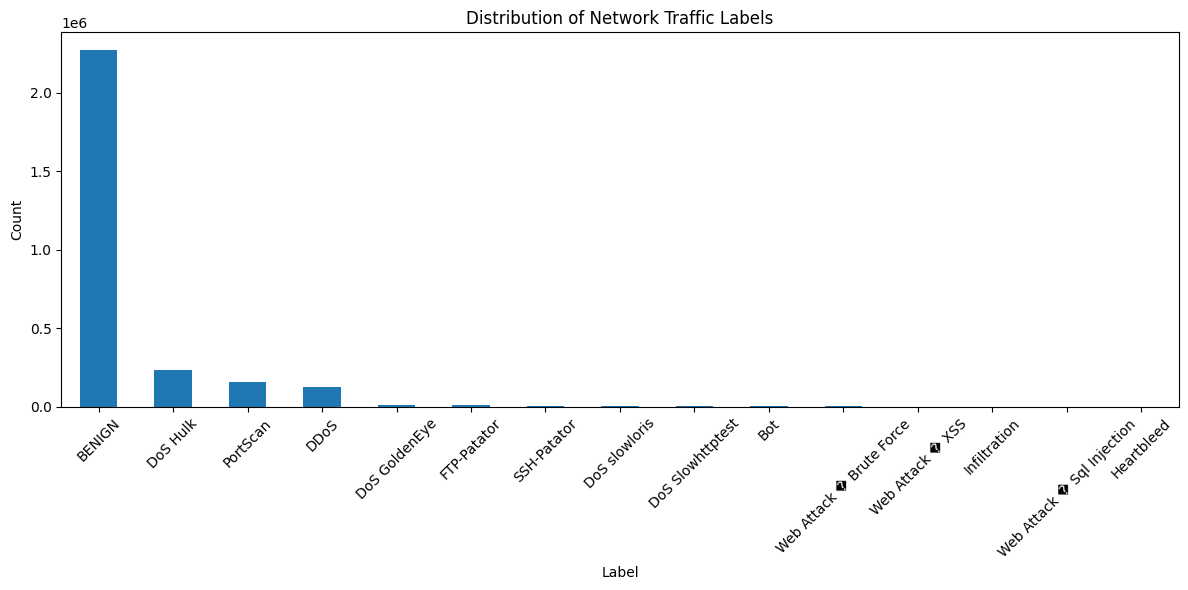

In [12]:
# First, let's see the actual column names
print("Actual column names in the dataset:")
print(df.columns.tolist())

# Clean the column names by stripping whitespace
df.columns = df.columns.str.strip()

# Now let's look at the distribution of labels
print("\nDistribution of Labels:")
print(df['Label'].value_counts())  # Note the space before 'Label'
print("\nPercentage Distribution:")
print(df['Label'].value_counts(normalize=True) * 100)

# Create a bar plot of label distribution
plt.figure(figsize=(12, 6))
df['Label'].value_counts().plot(kind='bar')
plt.title('Distribution of Network Traffic Labels')
plt.xlabel('Label')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

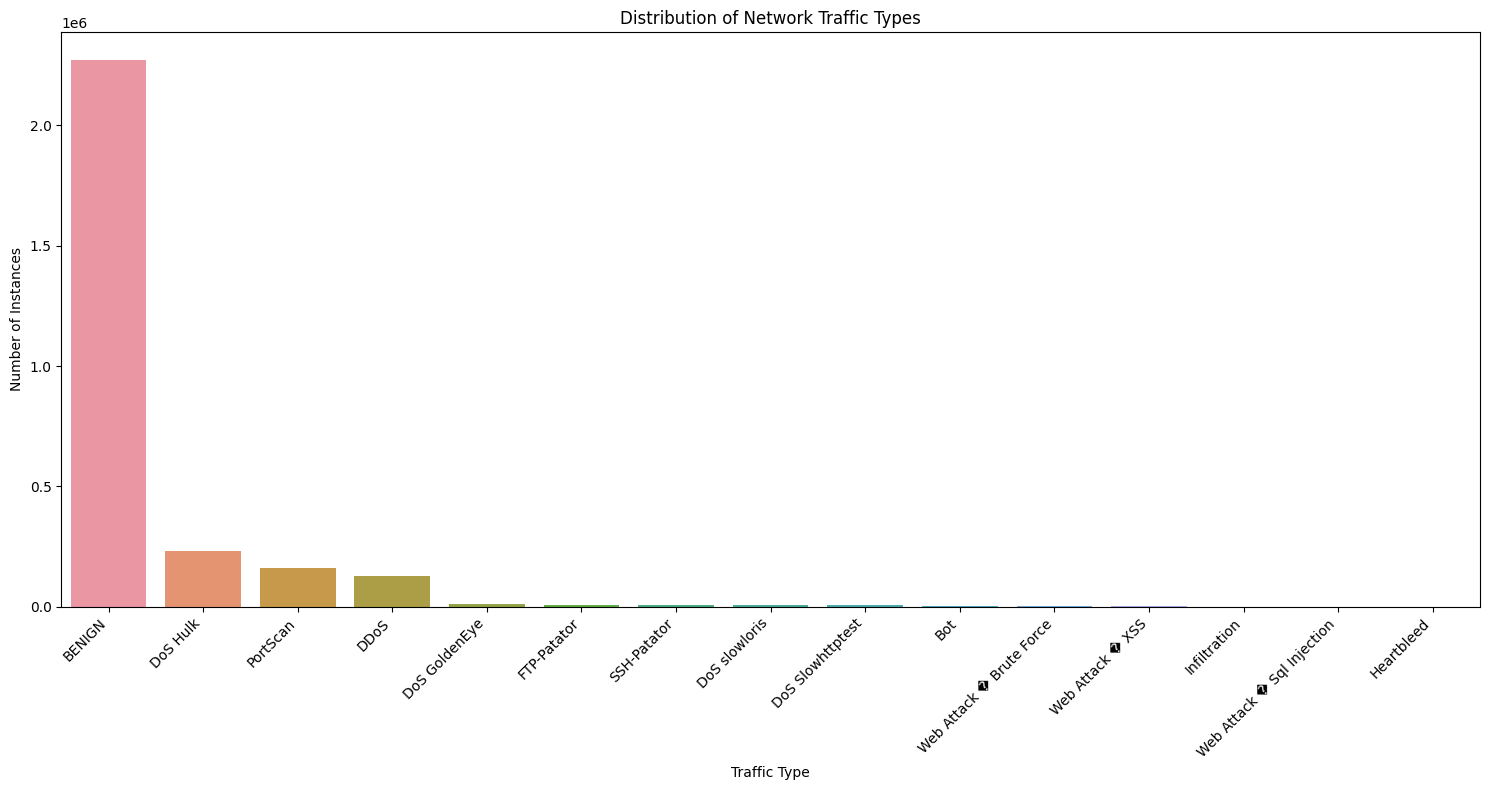

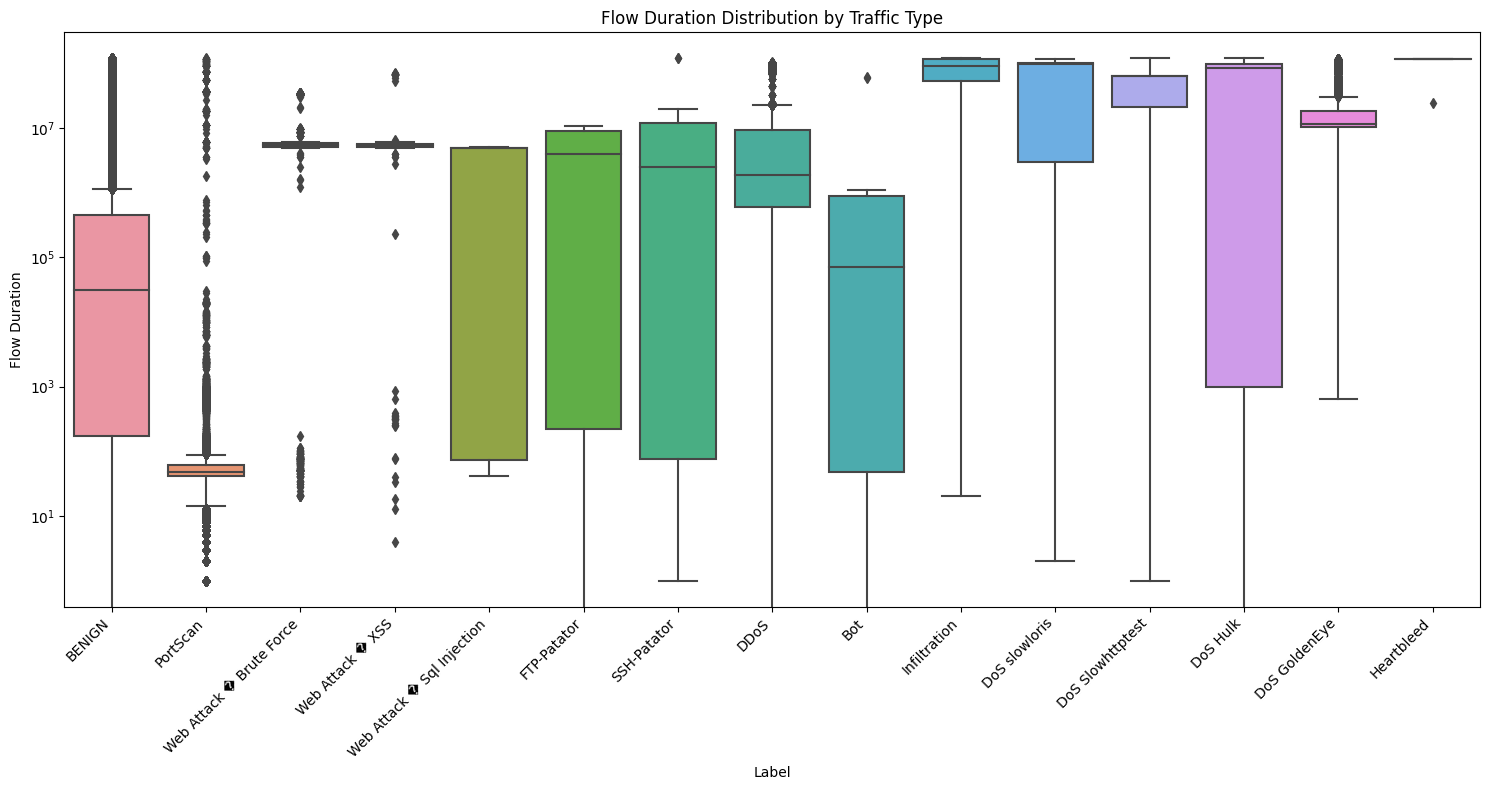

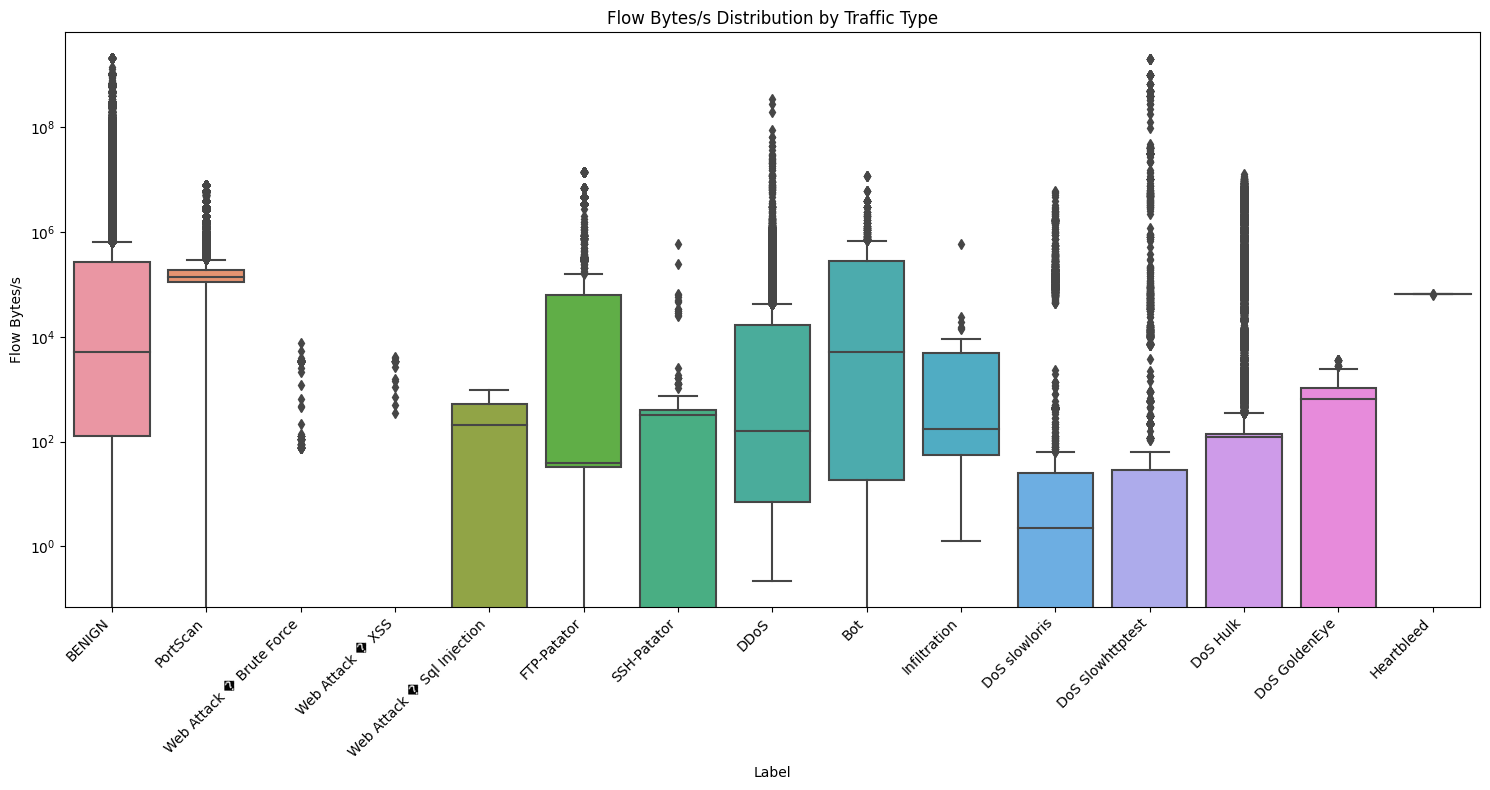

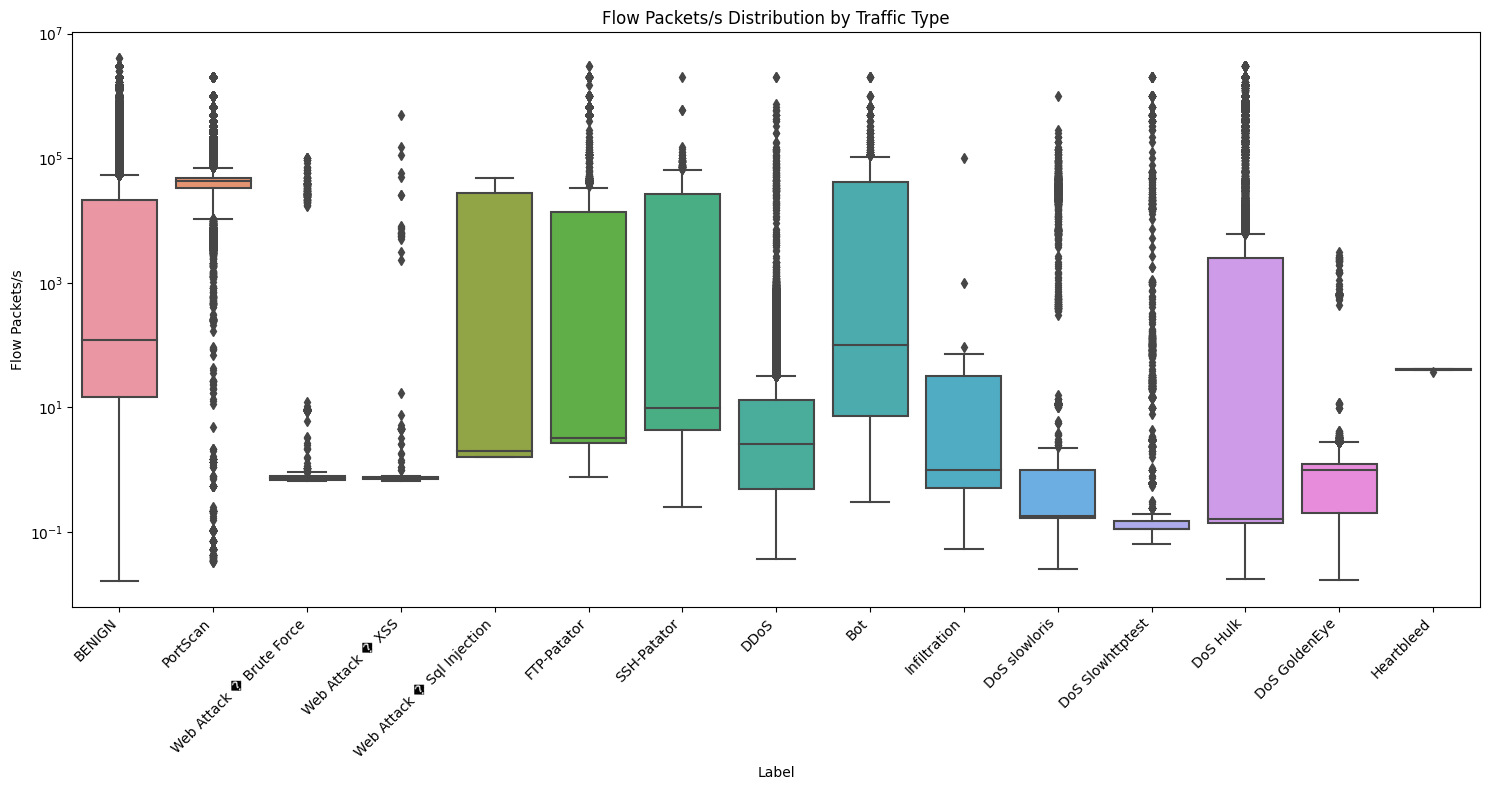

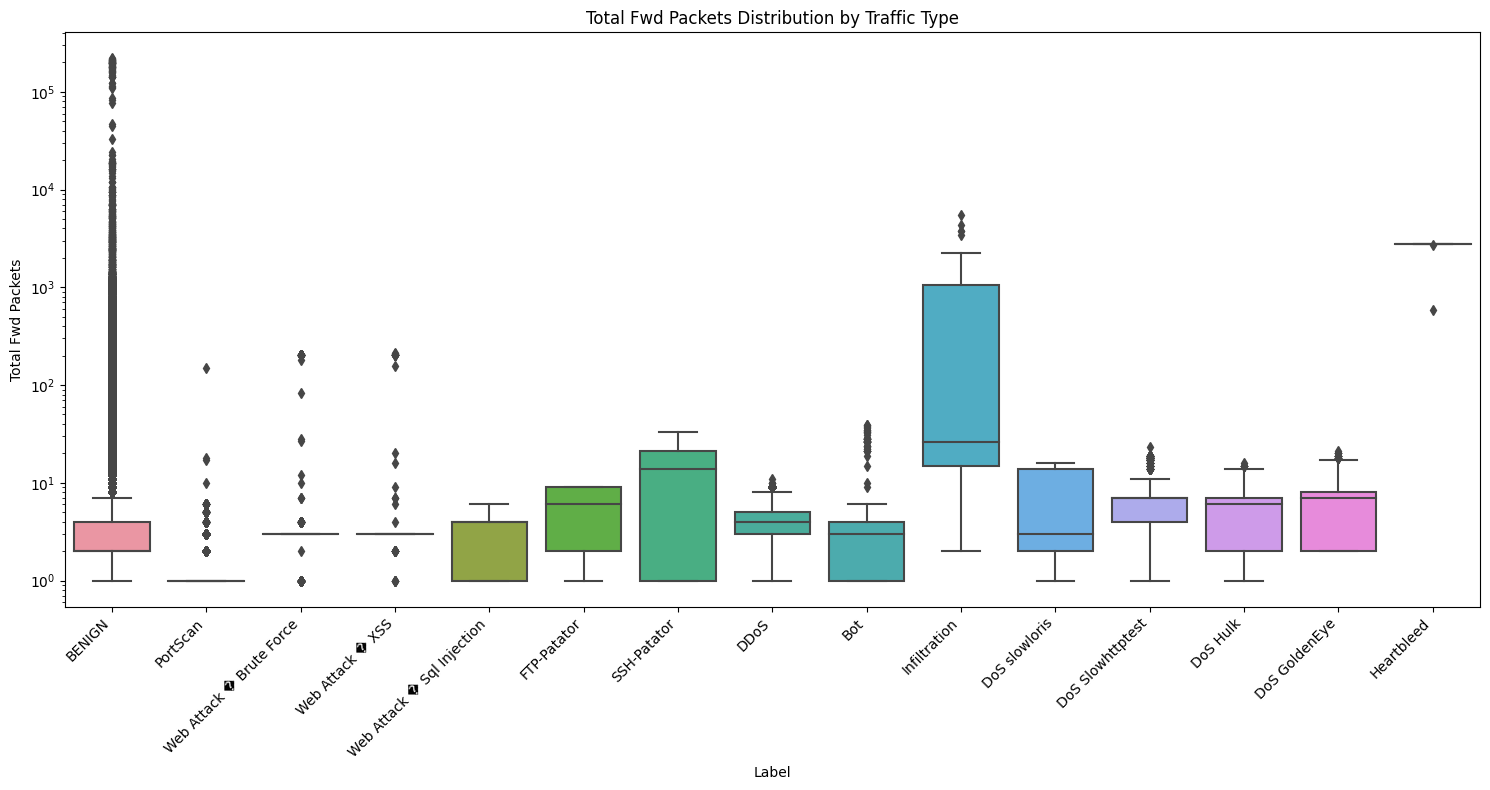

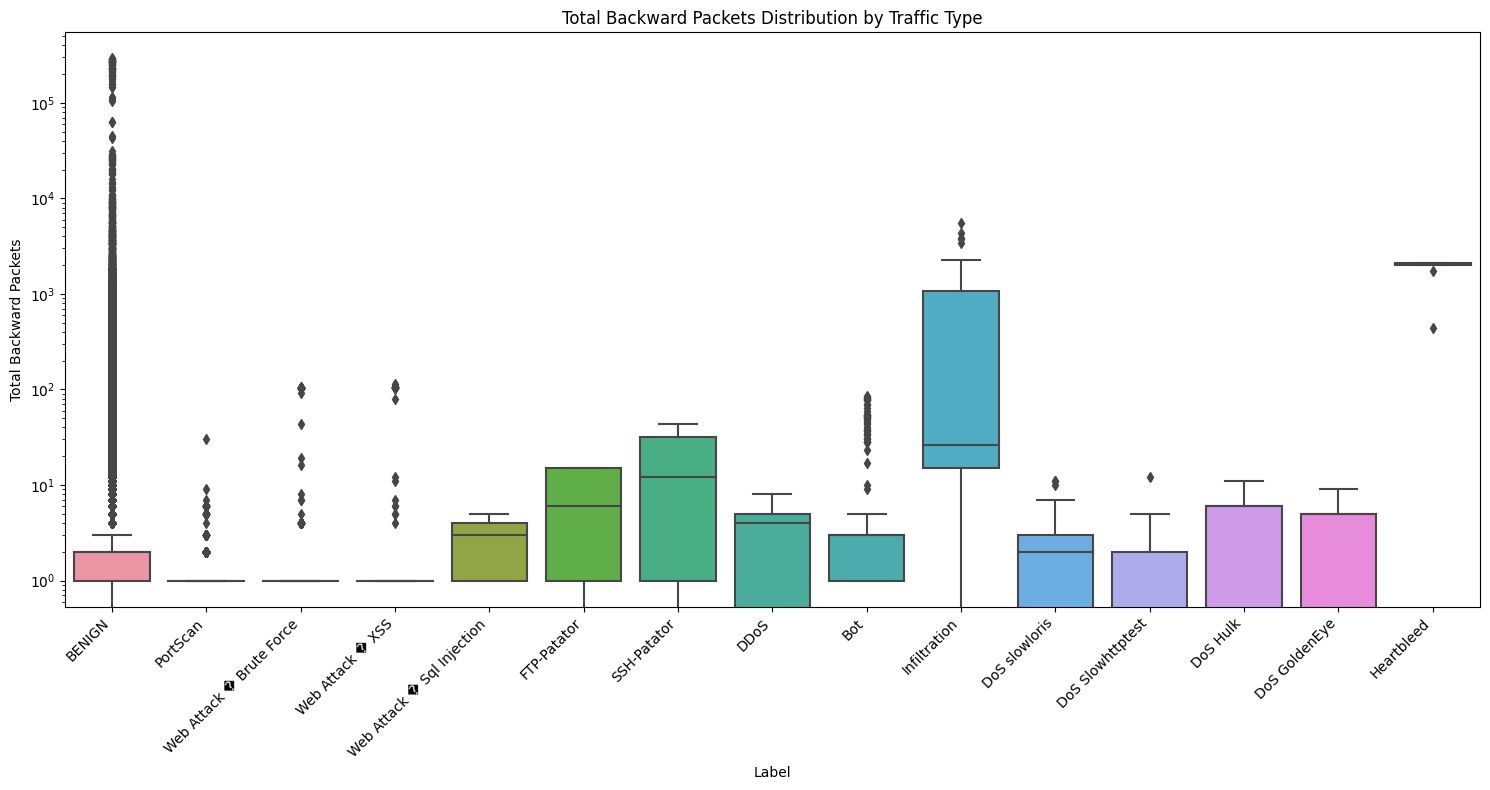

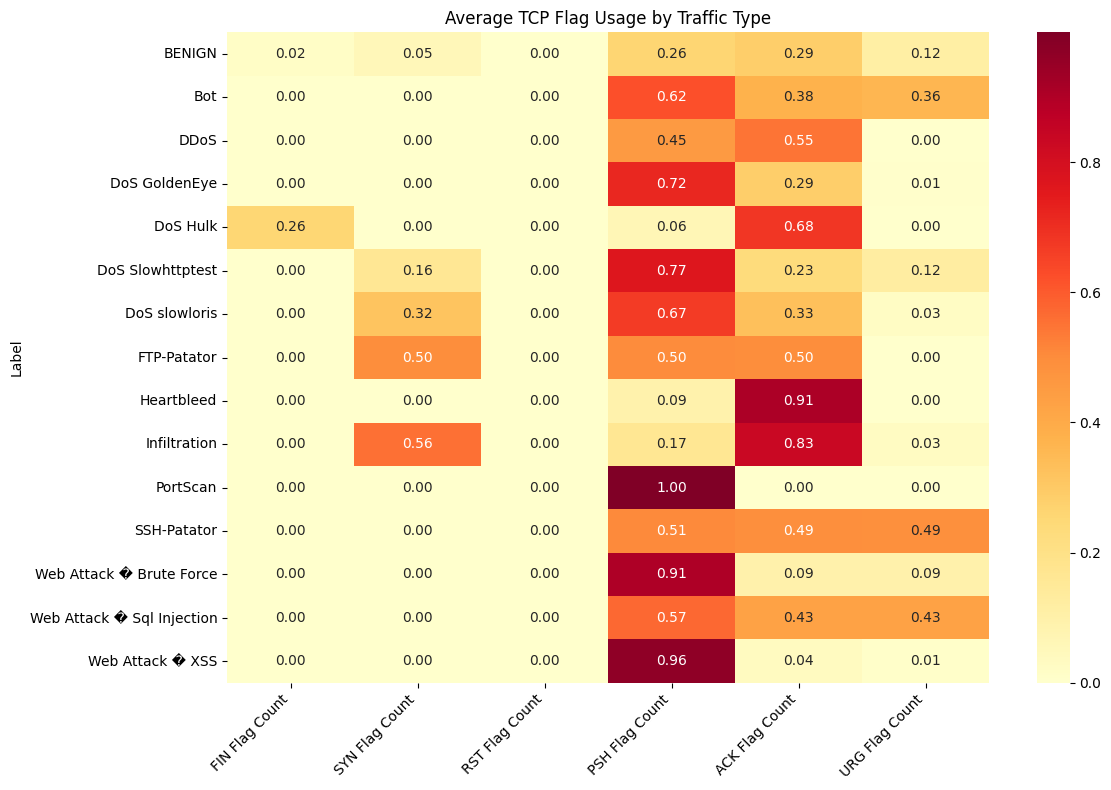


Basic Statistics by Attack Type:

Number of packets statistics:
                           Total Fwd Packets               \
                                        mean          std   
Label                                                       
BENIGN                             10.654173   836.535623   
Bot                                 3.193795     4.019112   
DDoS                                4.472439     1.897807   
DoS GoldenEye                       5.904401     3.008408   
DoS Hulk                            5.279656     2.565820   
DoS Slowhttptest                    5.741771     3.329523   
DoS slowloris                       6.337129     5.749611   
FTP-Patator                         5.496977     3.499859   
Heartbleed                       2583.727273   662.093663   
Infiltration                      830.222222  1502.960547   
PortScan                            1.017580     0.425594   
SSH-Patator                        11.124979    10.123281   
Web Attack � Brute F

<ipython-input-13-973efaa5f1e9>:50: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"2. Most common attack: {df['Label'].value_counts().index[1]} ({df['Label'].value_counts(normalize=True)[1]:.2%})")
<ipython-input-13-973efaa5f1e9>:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"3. Rarest attack: {df['Label'].value_counts().index[-1]} ({df['Label'].value_counts(normalize=True)[-1]:.2%})")


2. Most common attack: DoS Hulk (8.16%)
3. Rarest attack: Heartbleed (0.00%)

Packet Size Analysis by Attack Type:
                                   mean         std          min          max
Label                                                                        
BENIGN                       124.092328  196.757864     0.000000  3893.333333
Bot                           55.261185  212.868751     0.000000  1813.269565
DDoS                         822.612002  658.844814     3.000000  2324.200000
DoS GoldenEye                541.949685  384.563422     0.000000  1126.454545
DoS Hulk                     640.007478  466.315470     0.000000  1995.833333
DoS Slowhttptest             180.296803  405.808922     0.000000  1986.000000
DoS slowloris                 55.722392   72.103651     0.000000   697.857143
FTP-Patator                   11.639573    1.819886     0.000000    14.000000
Heartbleed                  1627.051890   31.233123  1603.603574  1713.913910
Infiltration               

In [13]:
# Create a more visual representation of the class distribution
plt.figure(figsize=(15, 8))
sns.barplot(x=df['Label'].value_counts().index, 
            y=df['Label'].value_counts().values)
plt.title('Distribution of Network Traffic Types')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Number of Instances')
plt.xlabel('Traffic Type')
plt.tight_layout()
plt.show()

# Let's analyze key features for different types of attacks
key_features = ['Flow Duration', 'Flow Bytes/s', 'Flow Packets/s', 
                'Total Fwd Packets', 'Total Backward Packets']

# Create box plots for key features across different attack types
for feature in key_features:
    plt.figure(figsize=(15, 8))
    sns.boxplot(x='Label', y=feature, data=df)
    plt.title(f'{feature} Distribution by Traffic Type')
    plt.xticks(rotation=45, ha='right')
    plt.yscale('log')  # Using log scale due to large value ranges
    plt.tight_layout()
    plt.show()

# Analyze TCP flags distribution across different attacks
tcp_flags = ['FIN Flag Count', 'SYN Flag Count', 'RST Flag Count', 
             'PSH Flag Count', 'ACK Flag Count', 'URG Flag Count']

# Calculate mean flag counts for each attack type
flag_means = df.groupby('Label')[tcp_flags].mean()

# Create a heatmap of TCP flags usage
plt.figure(figsize=(12, 8))
sns.heatmap(flag_means, annot=True, fmt='.2f', cmap='YlOrRd')
plt.title('Average TCP Flag Usage by Traffic Type')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Calculate basic statistics for each attack type
print("\nBasic Statistics by Attack Type:")
print("\nNumber of packets statistics:")
attack_stats = df.groupby('Label')[['Total Fwd Packets', 'Total Backward Packets']].agg(['mean', 'std'])
print(attack_stats)

# Print some insights about the different attack types
print("\nKey Observations:")
print(f"1. Benign traffic comprises {df['Label'].value_counts(normalize=True)['BENIGN']:.2%} of the dataset")
print(f"2. Most common attack: {df['Label'].value_counts().index[1]} ({df['Label'].value_counts(normalize=True)[1]:.2%})")
print(f"3. Rarest attack: {df['Label'].value_counts().index[-1]} ({df['Label'].value_counts(normalize=True)[-1]:.2%})")

# Analyze packet size characteristics
print("\nPacket Size Analysis by Attack Type:")
packet_stats = df.groupby('Label')['Average Packet Size'].agg(['mean', 'std', 'min', 'max'])
print(packet_stats)

In [14]:
# Import necessary libraries
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_fscore_support
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [15]:
# Encode labels
le = LabelEncoder()
df['Label_encoded'] = le.fit_transform(df['Label'])

# Handle rare classes by grouping them into 'Rare' category
rare_labels = ['Infiltration', 'Web Attack � Sql Injection', 'Heartbleed']
df['Label'] = df['Label'].apply(lambda x: 'Rare' if x in rare_labels else x)

# Update label encoder
df['Label_encoded'] = le.fit_transform(df['Label'])

In [16]:
# Split data
X = df.drop(['Label', 'Label_encoded'], axis=1)
y = df['Label_encoded']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [17]:
# Define sampling strategies
over_strategy = {
    le.transform(['DoS GoldenEye'])[0]: 20000,
    le.transform(['FTP-Patator'])[0]: 15000,
    le.transform(['SSH-Patator'])[0]: 10000,
    le.transform(['DoS slowloris'])[0]: 10000,
    le.transform(['DoS Slowhttptest'])[0]: 10000,
    le.transform(['Bot'])[0]: 5000,
    le.transform(['Web Attack � Brute Force'])[0]: 5000,
    le.transform(['Web Attack � XSS'])[0]: 5000,
    le.transform(['Rare'])[0]: 5000
}

under_strategy = {le.transform(['BENIGN'])[0]: 300000}

In [18]:
# Create resampling pipeline
resampler = Pipeline([
    ('over', SMOTE(sampling_strategy=over_strategy, k_neighbors=5)),
    ('under', RandomUnderSampler(sampling_strategy=under_strategy))
])

In [20]:
# Resample data
X_res, y_res = resampler.fit_resample(X_train, y_train)

# Scale features
scaler = StandardScaler()
X_res_scaled = scaler.fit_transform(X_res)
X_test_scaled = scaler.transform(X_test)

# Initialize models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, class_weight='balanced'),
    'Random Forest': RandomForestClassifier(class_weight='balanced_subsample'),
    'XGBoost': XGBClassifier(scale_pos_weight=len(y_res)/np.bincount(y_res)),
    'SVM': SVC(class_weight='balanced'),
    'KNN': KNeighborsClassifier(),
    'Gradient Boosting': GradientBoostingClassifier()
}

# Evaluate models
results = {}
for name, model in models.items():
    skf = StratifiedKFold(n_splits=5)
    cv_scores = cross_val_score(model, X_res_scaled, y_res, cv=skf, scoring='f1_weighted')
    model.fit(X_res_scaled, y_res)
    y_pred = model.predict(X_test_scaled)
    
    # Store results
    results[name] = {
        'cv_mean_f1': cv_scores.mean(),
        'test_report': classification_report(y_test, y_pred, target_names=le.classes_, output_dict=True),
        'confusion_matrix': confusion_matrix(y_test, y_pred)
    }
    print(f"{name} - CV Mean F1: {cv_scores.mean():.4f}")

# Find best model
best_model_name = max(results, key=lambda x: results[x]['cv_mean_f1'])
best_model = models[best_model_name]

# Generate detailed report for best model
best_report = results[best_model_name]['test_report']
print(f"\nBest Model: {best_model_name}")
print(classification_report(y_test, best_model.predict(X_test_scaled), target_names=le.classes_))

# Plot confusion matrix
plt.figure(figsize=(20,15))
sns.heatmap(results[best_model_name]['confusion_matrix'], 
            annot=True, fmt='d', cmap='Blues',
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.title('Confusion Matrix - Best Model')
plt.show()

# Feature Importance for tree-based models
if hasattr(best_model, 'feature_importances_'):
    plt.figure(figsize=(12,8))
    feat_importances = pd.Series(best_model.feature_importances_, index=X.columns)
    feat_importances.nlargest(20).plot(kind='barh')
    plt.title('Feature Importance')
    plt.show()

# Ensemble Approach
ensemble = VotingClassifier(estimators=[
    ('xgb', models['XGBoost']),
    ('rf', models['Random Forest']),
    ('gb', models['Gradient Boosting'])
], voting='soft')

ensemble.fit(X_res_scaled, y_res)
ens_pred = ensemble.predict(X_test_scaled)
print("\nEnsemble Performance:")
print(classification_report(y_test, ens_pred, target_names=le.classes_))

# Threshold Tuning (Example for XGBoost)
from sklearn.calibration import calibration_curve

probs = best_model.predict_proba(X_test_scaled)
adjusted_preds = np.zeros_like(probs)
thresholds = {i: 0.4 for i in range(len(le.classes_))}  # Custom thresholds

for i in range(len(le.classes_)):
    adjusted_preds[:,i] = (probs[:,i] > thresholds[i]).astype(int)

print("\nThreshold Adjusted Performance:")
print(classification_report(y_test, adjusted_preds.argmax(axis=1), target_names=le.classes_))

# ROC Curve (Multiclass)
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc

y_test_bin = label_binarize(y_test, classes=np.unique(y_res))
n_classes = y_test_bin.shape[1]

fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], probs[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(12,8))
colors = ['blue', 'red', 'green', 'orange', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan']
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color,
             label='ROC {0} (AUC = {1:0.2f})'
             ''.format(le.classes_[i], roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multiclass ROC Curve')
plt.legend(loc="lower right")
plt.show()

ValueError: Input X contains NaN.
SMOTE does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values